In [1]:
%%capture
# import dependencies 
import pickle 
from tqdm.notebook import tqdm
import numpy as np
from allennlp.data.tokenizers.spacy_tokenizer import SpacyTokenizer
import plotnine
from plotnine import *
import nltk
import pandas as pd
import os 
from utils import *

import warnings
warnings.filterwarnings('ignore')

2023-01-20 21:00:50.237544: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [2]:
def to_ggplot(list_of_data, list_of_editors, metric):
    rows = []
    for name, data in zip(list_of_editors, list_of_data):
        for step in data:
            for value in data[step]:
                rows.append([name, str(step), value])

    df = pd.DataFrame(rows, columns=["Editor", "Step", metric])
    return df 

## Define the hyperparameters of the Experiments

In [3]:
base_path = "Edits" # path of the data. This folder must contain 2 folders named imdb and newsgroup (one for each dataset)
datasets = ["imdb", "newsgroups"]
editors = ["mice", "polyjuice", "textfooler"]

# Minimality

## IMDb


### MInimality Figure

Minimality of imdb: 


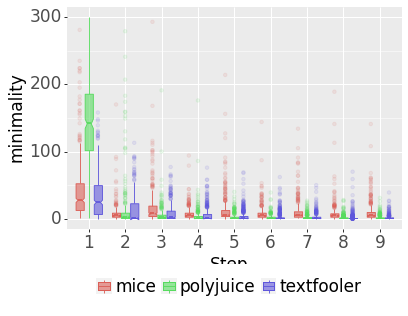

In [4]:
metric = "minimality"
dataset = "imdb"    

print (f"Minimality of {dataset}: ")
mice = load_pickle(f"Metrics/Minimality/{dataset}_mice_{metric}.pickle")
textfooler = load_pickle(f"Metrics/Minimality/{dataset}_textfooler_{metric}.pickle")
polyjuice = load_pickle(f"Metrics/Minimality/{dataset}_polyjuice_{metric}.pickle")

df = to_ggplot([mice,  {k:v for k, v in polyjuice.items() if k < 10}, {k:v for k, v in textfooler.items() if k < 10}], ["mice", "polyjuice", "textfooler"], metric)

gg = ggplot(df) + aes(x="Step", y= metric, color='Editor', fill ="Editor") + geom_boxplot(notch=True,outlier_alpha = 0.1, alpha = 0.6)+ylim(0, 300)+theme(legend_direction='horizontal', legend_position=(.5, -.09), legend_title=element_blank(), text = element_text(size = 17))
print (gg)

Minimality of newsgroups: 


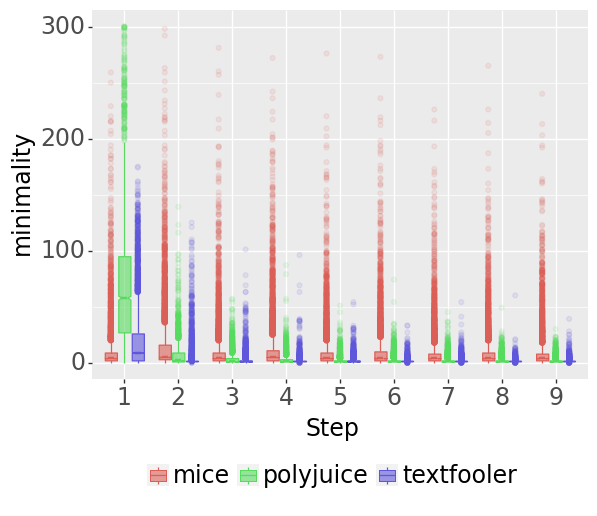

In [5]:
metric = "minimality"
dataset = "newsgroups"    

print (f"Minimality of {dataset}: ")
mice = load_pickle(f"Metrics/Minimality/{dataset}_mice_{metric}.pickle")
textfooler = load_pickle(f"Metrics/Minimality/{dataset}_textfooler_{metric}.pickle")
polyjuice = load_pickle(f"Metrics/Minimality/{dataset}_polyjuice_{metric}.pickle")

df = to_ggplot([mice,  {k:v for k, v in polyjuice.items() if k < 10}, {k:v for k, v in textfooler.items() if k < 10}], ["mice", "polyjuice", "textfooler"], metric)

gg = ggplot(df) + aes(x="Step", y= metric, color='Editor', fill ="Editor") + geom_boxplot(notch=True,outlier_alpha = 0.1, alpha = 0.6)+ylim(0, 300)+theme(legend_direction='horizontal', legend_position=(.5, -.09), legend_title=element_blank(), text = element_text(size = 17))
print (gg)

## Inconsistency of Minimality

Inconsistency of minimality of imdb: 


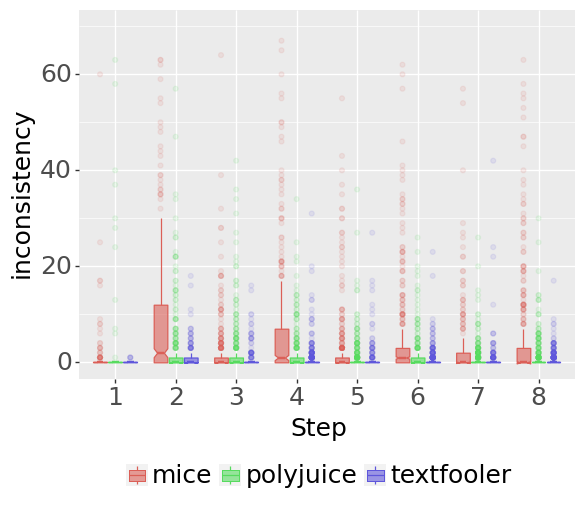

In [6]:
metric = "inconsistency"
dataset = "imdb"

print (f"Inconsistency of minimality of {dataset}: ")
mice = load_pickle(f"Metrics/Inconsistency/{dataset}_mice_{metric}.pickle")
textfooler = load_pickle(f"Metrics/Inconsistency/{dataset}_textfooler_{metric}.pickle")
polyjuice = load_pickle(f"Metrics/Inconsistency/{dataset}_polyjuice_{metric}.pickle")

df = to_ggplot([{k:v for k, v in mice.items() if k < 10},  {k:v for k, v in polyjuice.items() if k < 10}, {k:v for k, v in textfooler.items() if k < 10}], ["mice", "polyjuice", "textfooler"], metric)

gg = ggplot(df) + aes(x="Step", y= metric, color='Editor', fill ="Editor") + geom_boxplot(notch=True,outlier_alpha = 0.1, alpha = 0.6)+ylim(0,70)+theme(legend_direction='horizontal', legend_position=(.5, -.09), legend_title=element_blank(), text = element_text(size = 18))
print (gg)

Inconsistency of minimality of newsgroups: 


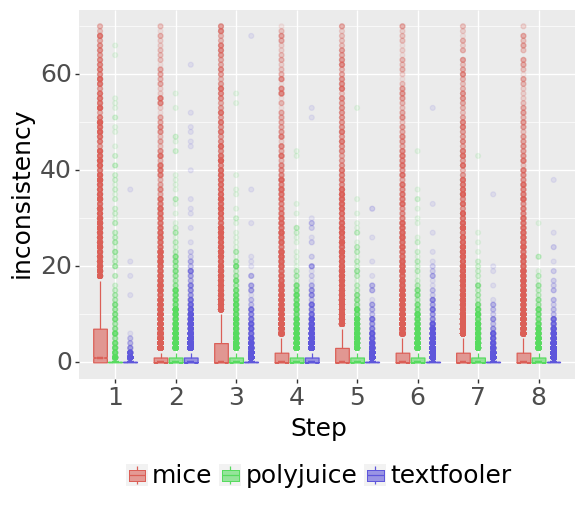

In [7]:
metric = "inconsistency"
dataset = "newsgroups"


print (f"Inconsistency of minimality of {dataset}: ")
mice = load_pickle(f"Metrics/Inconsistency/{dataset}_mice_{metric}.pickle")
textfooler = load_pickle(f"Metrics/Inconsistency/{dataset}_textfooler_{metric}.pickle")
polyjuice = load_pickle(f"Metrics/Inconsistency/{dataset}_polyjuice_{metric}.pickle")

df = to_ggplot([{k:v for k, v in mice.items() if k < 10},  {k:v for k, v in polyjuice.items() if k < 10}, {k:v for k, v in textfooler.items() if k < 10}], ["mice", "polyjuice", "textfooler"], metric)

gg = ggplot(df) + aes(x="Step", y= metric, color='Editor', fill ="Editor") + geom_boxplot(notch=True,outlier_alpha = 0.1, alpha = 0.6)+ylim(0,70)+theme(legend_direction='horizontal', legend_position=(.5, -.09), legend_title=element_blank(), text = element_text(size = 18))
print (gg)

## Inconsistency of Minimality Table

In [8]:
print ("Inconsistency of Minimality Table")

print ("       MiCE  Polyjuice TextFooler")
print ("----"*8)
for dataset in datasets:
    
    print (f"             {dataset} ")
    print ("----"*8)
    
    mice = load_pickle(f"Metrics/Inconsistency/{dataset}_mice_{metric}.pickle")
    textfooler = load_pickle(f"Metrics/Inconsistency/{dataset}_textfooler_{metric}.pickle")
    polyjuice = load_pickle(f"Metrics/Inconsistency/{dataset}_polyjuice_{metric}.pickle")
    df = to_ggplot([mice,  {k:v for k, v in polyjuice.items() if k < 10}, {k:v for k, v in textfooler.items() if k < 10}], ["mice", "polyjuice", "textfooler"], metric)
    
    
    for step in [1,3,5,7,9]:
        m_editor = np.mean(df[(df["Editor"] == "mice") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
        p_editor = np.mean(df[(df["Editor"] == "polyjuice") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
        t_editor = np.mean(df[(df["Editor"] == "textfooler") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
        
        m_editor = round(m_editor, 2)
        p_editor = round(p_editor, 2)
        t_editor = round(t_editor, 2)
        print (f"inc@{step}↑: {m_editor}\t{p_editor}\t{t_editor}")
    
    print ("----"*8)

Inconsistency of Minimality Table
       MiCE  Polyjuice TextFooler
--------------------------------
             imdb 
--------------------------------
inc@1↑: 0.86	6.21	0.01
inc@3↑: 4.65	3.98	0.36
inc@5↑: 4.87	2.9	0.47
inc@7↑: 4.68	2.37	0.49
inc@9↑: 4.73	2.22	0.49
--------------------------------
             newsgroups 
--------------------------------
inc@1↑: 11.11	0.99	0.04
inc@3↑: 7.89	1.35	0.46
inc@5↑: 6.92	1.3	0.49
inc@7↑: 6.34	1.24	0.46
inc@9↑: 6.11	1.21	0.46
--------------------------------


## Base Perplexity

Base Perplexity: imdb: 


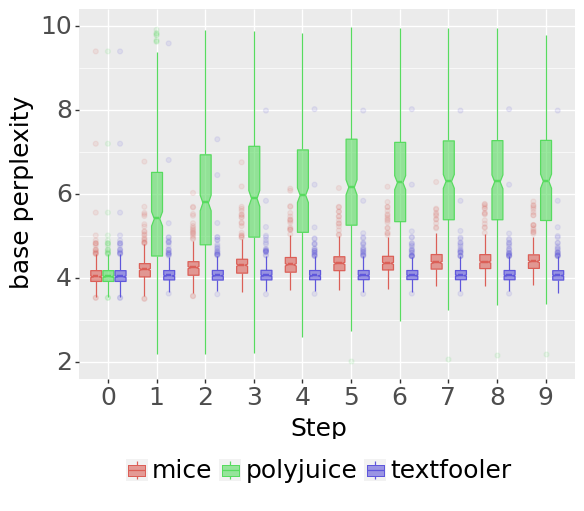


Base Perplexity for imdb dataset:
textfooler, perplexity@1: 4.117835490720178
textfooler, perplexity@9: 4.116119103199368
********************
mice, perplexity@1: 4.2546091101838925
mice, perplexity@9: 4.4511797654933
********************
polyjuice, perplexity@1: 8.01006495120222
polyjuice, perplexity@9: 8.158607033582834
********************
----------------------------------------


In [9]:
metric = "perplexity"
dataset = "imdb"


print (f"Base Perplexity: {dataset}: ")
mice = np.load(f"Metrics/Base Perplexity/ppl_{dataset}_mice_gpt2.npy")
textfooler = np.load(f"Metrics/Base Perplexity/ppl_{dataset}_textfooler_gpt2.npy")
polyjuice = np.load(f"Metrics/Base Perplexity/ppl_{dataset}_polyjuice_gpt2.npy")


mice = {i: [j for j in row if j != 0]  for i, row in enumerate(mice.T)}
textfooler = {i: [j for j in row if j != 0]  for i, row in enumerate(textfooler.T)}
polyjuice = {i: [j for j in row if j != 0]  for i, row in enumerate(polyjuice.T)}

df = to_ggplot([mice,  polyjuice, textfooler], ["mice", "polyjuice", "textfooler"], metric)

gg = ggplot(df) + aes(x="Step",y= metric, color='Editor', fill ="Editor") + ylim(2,10) + geom_boxplot(notch=True,outlier_alpha = 0.1, alpha = 0.6)+theme(legend_direction='horizontal', legend_position=(.5, -.08), legend_title=element_blank(), text = element_text(size = 18)) + ylab("base perplexity")
print (gg)

print (f"Base Perplexity for {dataset} dataset:")
for editor in set(df["Editor"].tolist()):
    for step in ["1", "9"]:
        value = np.mean(df[(df["Editor"] == editor) & (df["Step"] == step)][metric])
        print (f"{editor}, {metric}@{step}: {value}")
    print ("**"*10)
print ("----"*10)

Base Perplexity: newsgroups: 


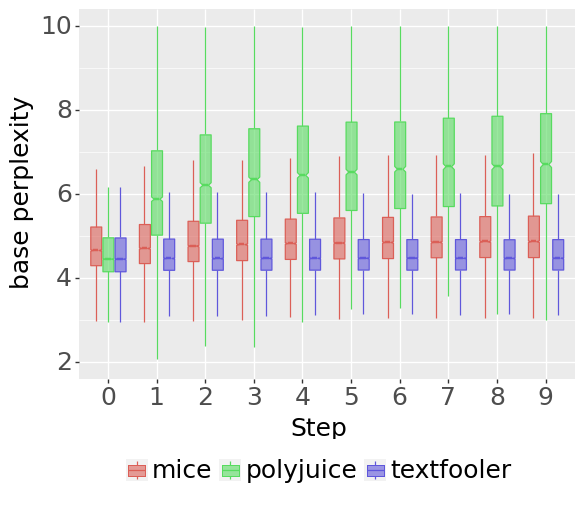


Base Perplexity for newsgroups dataset:
textfooler, perplexity@1: 4.80117494098798
textfooler, perplexity@9: 4.776058573353361
********************
mice, perplexity@1: 5.164280461976966
mice, perplexity@9: 5.360741495272462
********************
polyjuice, perplexity@1: 8.926575396476112
polyjuice, perplexity@9: 7.878006728886228
********************
----------------------------------------


In [10]:
metric = "perplexity"
dataset = "newsgroups"


print (f"Base Perplexity: {dataset}: ")
mice = np.load(f"Metrics/Base Perplexity/ppl_{dataset}_mice_gpt2.npy")
textfooler = np.load(f"Metrics/Base Perplexity/ppl_{dataset}_textfooler_gpt2.npy")
polyjuice = np.load(f"Metrics/Base Perplexity/ppl_{dataset}_polyjuice_gpt2.npy")


mice = {i: [j for j in row if j != 0]  for i, row in enumerate(mice.T)}
textfooler = {i: [j for j in row if j != 0]  for i, row in enumerate(textfooler.T)}
polyjuice = {i: [j for j in row if j != 0]  for i, row in enumerate(polyjuice.T)}

df = to_ggplot([mice,  polyjuice, textfooler], ["mice", "polyjuice", "textfooler"], metric)

gg = ggplot(df) + aes(x="Step",y= metric, color='Editor', fill ="Editor") + ylim(2,10) + geom_boxplot(notch=True,outlier_alpha = 0.00, alpha = 0.6)+theme(legend_direction='horizontal', legend_position=(.5, -.08), legend_title=element_blank(), text = element_text(size = 18)) + ylab("base perplexity")
print (gg)

print (f"Base Perplexity for {dataset} dataset:")
for editor in set(df["Editor"].tolist()):
    for step in ["1", "9"]:
        value = np.mean(df[(df["Editor"] == editor) & (df["Step"] == step)][metric])
        print (f"{editor}, {metric}@{step}: {value}")
    print ("**"*10)
print ("----"*10)

## Fine Perplexity 

Fine Perplexity of imdb: 


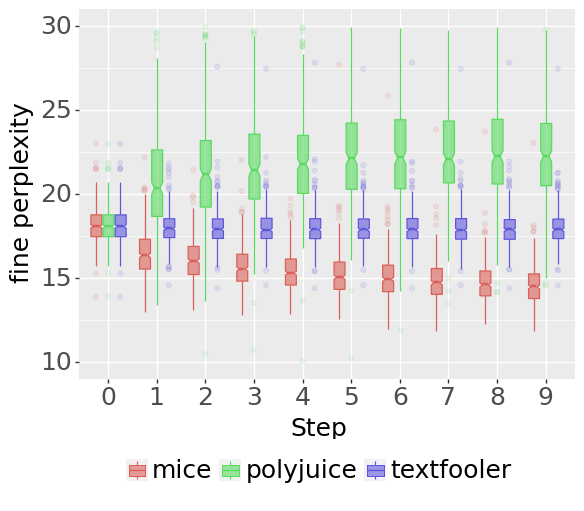


Fine Perplexity for imdb dataset:
textfooler, fine perplexity@1: 18.066187581993866
textfooler, fine perplexity@9: 17.99172246096582
********************
mice, fine perplexity@1: 16.531539647042614
mice, fine perplexity@9: 14.606942942413543
********************
polyjuice, fine perplexity@1: 35.984528096834026
polyjuice, fine perplexity@9: 30.73085519839556
********************
----------------------------------------


In [11]:
metric = "fine perplexity"
dataset = "imdb"


print (f"Fine Perplexity of {dataset}: ")
mice = np.load(f"Metrics/Fine Perplexity/ppl_{dataset}_mice_gpt2-imdb.npy")
textfooler = np.load(f"Metrics/Fine Perplexity/ppl_{dataset}_textfooler_gpt2-imdb.npy")
polyjuice = np.load(f"Metrics/Fine Perplexity/ppl_{dataset}_polyjuice_gpt2-imdb.npy")


mice = {i: [j for j in row if j != 0]  for i, row in enumerate(mice.T)}
textfooler = {i: [j for j in row if j != 0]  for i, row in enumerate(textfooler.T)}
polyjuice = {i: [j for j in row if j != 0]  for i, row in enumerate(polyjuice.T)}

df = to_ggplot([mice,  polyjuice, textfooler], ["mice", "polyjuice", "textfooler"], metric)

gg = ggplot(df) + aes(x="Step",y= metric, color='Editor', fill ="Editor") + ylim(10, 30) + geom_boxplot(notch=True,outlier_alpha = 0.1, alpha = 0.6)+theme(legend_direction='horizontal', legend_position=(.5, -.08), legend_title=element_blank(), text = element_text(size = 18)) + ylab("fine perplexity")
print (gg)

print (f"Fine Perplexity for {dataset} dataset:")
for editor in set(df["Editor"].tolist()):
    for step in ["1", "9"]:
        value = np.mean(df[(df["Editor"] == editor) & (df["Step"] == step)][metric])
        print (f"{editor}, {metric}@{step}: {value}")
    print ("**"*10)
print ("----"*10)

Fine Perplexity of newsgroups: 


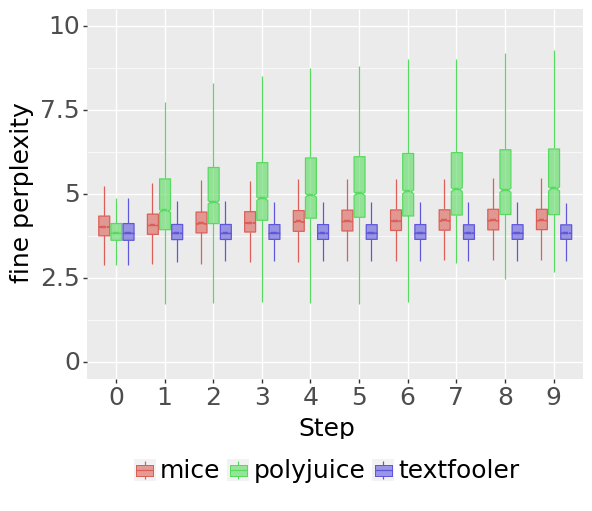


Fine Perplexity for newsgroups dataset:
textfooler, fine perplexity@1: 3.9976598365248015
textfooler, fine perplexity@9: 3.9845316395601142
********************
mice, fine perplexity@1: 4.276442165160209
mice, fine perplexity@9: 4.400595965068608
********************
polyjuice, fine perplexity@1: 6.678425184777875
polyjuice, fine perplexity@9: 5.905616299553669
********************
----------------------------------------


In [12]:
metric = "fine perplexity"
dataset = "newsgroups"


print (f"Fine Perplexity of {dataset}: ")
mice = np.load(f"Metrics/Fine Perplexity/ppl_{dataset}_mice_GPT2-News.npy")
textfooler = np.load(f"Metrics/Fine Perplexity/ppl_{dataset}_textfooler_GPT2-News.npy")
polyjuice = np.load(f"Metrics/Fine Perplexity/ppl_{dataset}_polyjuice_GPT2-News.npy")


mice = {i: [j for j in row if j != 0]  for i, row in enumerate(mice.T)}
textfooler = {i: [j for j in row if j != 0]  for i, row in enumerate(textfooler.T)}
polyjuice = {i: [j for j in row if j != 0]  for i, row in enumerate(polyjuice.T)}

df = to_ggplot([mice,  polyjuice, textfooler], ["mice", "polyjuice", "textfooler"], metric)

gg = ggplot(df) + aes(x="Step",y= metric, color='Editor', fill ="Editor") + ylim(0, 10) + geom_boxplot(notch=True,outlier_alpha = 0.0, alpha = 0.6)+theme(legend_direction='horizontal', legend_position=(.5, -.08), legend_title=element_blank(), text = element_text(size = 18)) + ylab("fine perplexity")
print (gg)

print (f"Fine Perplexity for {dataset} dataset:")
for editor in set(df["Editor"].tolist()):
    for step in ["1", "9"]:
        value = np.mean(df[(df["Editor"] == editor) & (df["Step"] == step)][metric])
        print (f"{editor}, {metric}@{step}: {value}")
    print ("**"*10)
print ("----"*10)

# Probability of target class

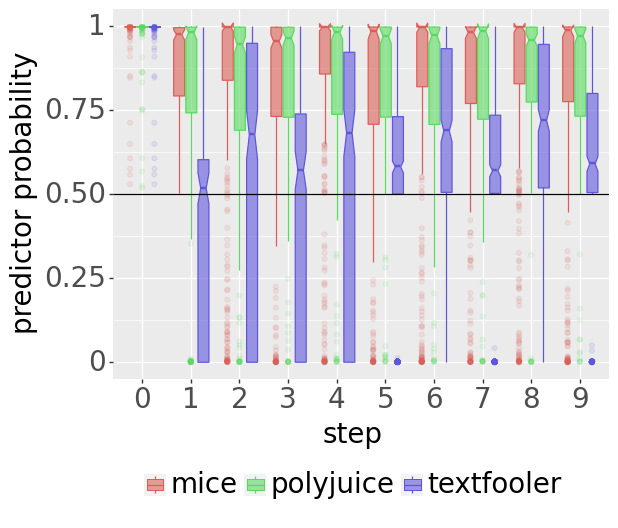

In [13]:
def probs_per_level(edits):

    probs = []
    probs.append(max(edits[0][1]))
    for i in range(1,len(edits)):
        if edits[i-1][1][0]>edits[i-1][1][1]:
            first = True
        else:
            first = False
        if first:
            probs.append(edits[i][1][1])
        else:
            probs.append(edits[i][1][0])

    return np.array(probs)


d = dict()
d['textfooler']=load_pickle("Edits/imdb/imdb_textfooler.pickle")
d['mice']=load_pickle("Edits/imdb/imdb_mice.pickle")
d['polyjuice']= load_pickle("Edits/imdb/imdb_polyjuice.pickle")

df = pd.DataFrame()
steps = list()
nerrors=list()
editors = list()
for editor in ['textfooler','mice','polyjuice']:
    g = np.array([probs_per_level(a) for a in d[editor]])
    for i in range(len(g)):
      for step in range (len(g[i][:10])):
        steps.append(str(step))
        nerrors.append(g[i][step])
        editors.append(editor)
df['step']=steps
df['editor']=editors
df['predictor probability']=nerrors
gg = ggplot(df) + aes(x="step", y="predictor probability",color='editor', fill = "editor") + geom_boxplot(notch=True,outlier_alpha = 0.1, alpha = 0.6)+geom_hline(yintercept = 0.5)+theme(legend_direction='horizontal', legend_position=(.5, -.11), legend_title=element_blank(), text = element_text(size = 20))
print(gg)



# Appendix 

In [14]:
spacy = SpacyTokenizer()
def tokenize(text):
    return spacy.tokenize(text)


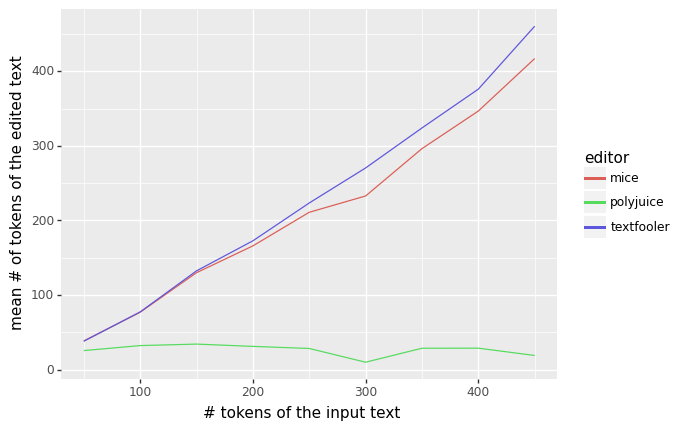

In [15]:

dataset = "imdb"
x, y, editors = [], [], []
for editor in ["mice", "textfooler", "polyjuice"]:
    edits = load_pickle(f"Edits/{dataset}/{dataset}_{editor}.pickle")

    bins = {i: [] for i in range (50, 500, 50)}
    for row in edits:
        if len(row) > 1:
            source_bin = tokenize(row[0][0])
            edited_text = tokenize(row[1][0])

            for i in range (50, 500, 50):
                if len(source_bin) < i:
                    break

            bins[i].append(len(edited_text)) 
          
        
    x += list(bins.keys())
    y += [np.mean(i) for i in bins.values()]
    editors += [editor]*len(bins)  
            
df = pd.DataFrame()
df["length of source text"] = x
df["length of edited text"] = y
df["editor"] = editors


gg = (
    ggplot(df, aes(x="length of source text", y="length of edited text", color='editor', fill = "editor"))
    + geom_line() 
    + labs(x="# tokens of the input text", y='mean # of tokens of the edited text')
    )
print (gg)

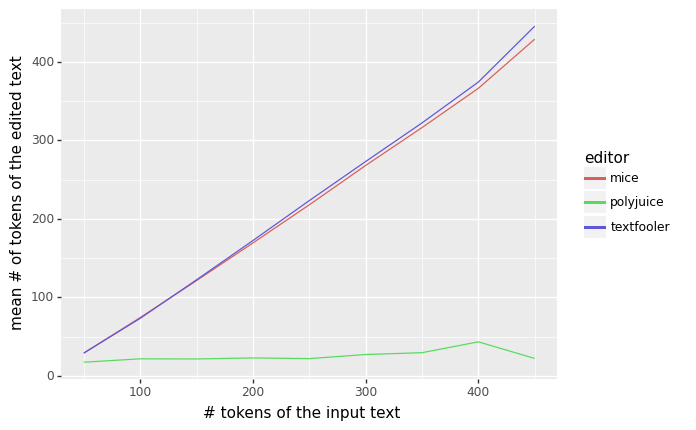

In [16]:
dataset = "newsgroups"
x, y, editors = [], [], []
for editor in ["mice", "textfooler", "polyjuice"]:
    edits = load_pickle(f"Edits/{dataset}/{dataset}_{editor}.pickle")

    bins = {i: [] for i in range (50, 500, 50)}
    for row in edits:
        if len(row) > 1:
            source_bin = tokenize(row[0][0])
            edited_text = tokenize(row[1][0])

            for i in range (50, 500, 50):
                if len(source_bin) < i:
                    break

            bins[i].append(len(edited_text)) 
          
        
    x += list(bins.keys())
    y += [np.mean(i) for i in bins.values()]
    editors += [editor]*len(bins)  
            
df = pd.DataFrame()
df["length of source text"] = x
df["length of edited text"] = y
df["editor"] = editors


gg = (
    ggplot(df, aes(x="length of source text", y="length of edited text", color='editor', fill = "editor"))
    + geom_line() 
    + labs(x="# tokens of the input text", y='mean # of tokens of the edited text')
    )
print (gg)